[**Dr. Kevin M. Moerman**](mailto:kevin.moerman@nuigalway.ie), _Lecturer in Biomedical Engineering_   

National University of Ireland Galway.   

---

\newpage

This is an [Octave](https://www.gnu.org/software/octave/) (an open source alternative to MATLAB) [Jupyter notebook](https://jupyter.org/)

# Vectors and dot products

* The dot product between two vectors yields a scalar:   
$$c=\mathbf{a} \cdot \mathbf{b}$$   
   
   
* In component notation the dot product can be written: 
$$c=a_1 b_1 + a_2 b_2 + a_3 b_3$$   
   
   
* Alternatively if repeated indices are summed over we may write (Einstein summation convention): 
$$c=a_i b_i$$

# Base vectors
We can formulate a set (a triplet) of so called _base vectors_ as follows 
$$\mathbf{\mathcal{E}}=\{\mathbf{e}_1,\mathbf{e}_2,\mathbf{e}_3\}$$

The base vectors are _unit vectors_ i.e., their lenght is 1 such that: 
$$|\mathbf{e}_i|=1$$

Furthermore they define a coordinate sytem and are mutually orthogonal such that:
$$\mathbf{e}_i \cdot \mathbf{e}_j=\begin{cases} 1 & i=j \\ 0 & i \neq j \end{cases}$$

This offers one means to define the Kronecker delta, which is a useful operator for later developments:
$$\delta_{ij}=\mathbf{e}_i \cdot \mathbf{e}_j$$

If one thinks of $\mathbf{e}_1$, $\mathbf{e}_2$, and $\mathbf{e}_3$ as playing the role of the $x$, $y$, and $z$ axis, then in a regular system one would write them:    

$\mathbf{e}_1=\begin{bmatrix} 1 \\ 0 \\ 0\end{bmatrix}$, and $\mathbf{e}_2=\begin{bmatrix} 0 \\ 1 \\ 0\end{bmatrix}$, and $\mathbf{e}_3=\begin{bmatrix} 0 \\ 0 \\ 1\end{bmatrix}$ 


In [41]:
e1=[1 0 0]'; e2=[0 1 0]'; e3=[0 0 1]'; % The base vectors
dot(e1,e2) % dot product e1 and e2
dot(e1,e1) % dot product e1 and e1
sum(e1.*e1) % dot product using sum of element-by-element multiplication

ans = 0
ans =  1
ans =  1


## Constructing vectors using base vectors
Any vector can be composed of a combination of their scalar components with these base vectors: 

$$\mathbf{a}=a_1 \mathbf{e}_1+a_2 \mathbf{e}_2+a_3 \mathbf{e}_3=a_i \mathbf{e_i}$$

### DIY numerical implementation

In [42]:
a_1=pi; a_2=1; a_3=2.5; % The components of a vector
e_1=[1 0 0]'; e_2=[0 1 0]'; e_3=[0 0 1]'; % The base vectors
a=a_1.*e_1+a_2.*e_2+a_3.*e_3 % Constructing the vector

a =

   3.1416
   1.0000
   2.5000



## "Picking out" vector components using base vectors
Dot products between vectors and a base vector "pick out" the corresponding components:   
$$a_i=\mathbf{a} \cdot \mathbf{e}_i$$

For instance for the first component:
$$a_1=\mathbf{a}\cdot \mathbf{e_1} =a_1\cdot1 + a_2\cdot0 + a_3\cdot0$$
Therefore if $\mathbf{e}_1$ would be labelled the x-axis then this components would be the x-component of $\mathbf{a}$. 
So when one sees a dot product like this you can think of it as "measuring" the vector allong direction $\mathbf{e}_i$

### DIY numerical implementation

In [43]:
a=[pi 1 2.5]'; % Define vector
e1=[1 0 0]'; % Base vector
a_1=dot(a,e1) % Use base vector to pick out a component

a_1 =  3.1416


## The dyadic (or tensor) product
The dyadic (or tensor) product, denoted using the symbol $\otimes$ for two vectors e.g. $\mathbf{a}$ and $\mathbf{b}$ is defined as:
  
  
$$\mathbf{a} \otimes \mathbf{b}=\begin{bmatrix} a_1b_1 & a_1b_2 & a_1b_3\\ a_2b_1 & a_2b_2 & a_2b_3 \\ a_3b_1 & a_3b_2 & a_3b_3\end{bmatrix}=\mathbf{a}\mathbf{b}^\top$$


### DIY numerical implementation

In [44]:
a=[1 2 3]'; b=[4 5 6]'; %A set of column vectors
a*b' %The dyadic product of the two vectors -> a times b transposed

ans =

    4    5    6
    8   10   12
   12   15   18



In [45]:
%Create a "dyadic" product function to use elsewhere in the code

%Creating a so-called "anonymous function" for the dyadic product
dyadic = @(a,b) a*b'; 

%Testing the function
a=[1 2 3]'; b=[4 5 6]'; %A set of column vectors
dyadic(a,b)  %The dyadic product of the two vectors -> a times b transposed

ans =

    4    5    6
    8   10   12
   12   15   18



### The dyadic product for base vectors
Given the rules outlined we can study dyadic products for base vectors e.g.:   

$\mathbf{e}_1 \otimes \mathbf{e}_1=\begin{bmatrix} 1 & 0 & 0\\ 0 & 0 & 0 \\ 0 & 0 & 0\end{bmatrix}$, and $\mathbf{e}_2 \otimes \mathbf{e}_2=\begin{bmatrix} 0 & 0 & 0\\ 0 & 1 & 0 \\ 0 & 0 & 0\end{bmatrix}$, and $\mathbf{e}_3 \otimes \mathbf{e}_3=\begin{bmatrix} 0 & 0 & 0\\ 0 & 0 & 0 \\ 0 & 0 & 1\end{bmatrix}$, and $\mathbf{e}_3 \otimes \mathbf{e}_1=\begin{bmatrix} 0 & 0 & 0\\ 0 & 0 & 0 \\ 1 & 0 & 0\end{bmatrix}$

Which leads us to the definition of the identity tensor $\mathbf{I}$: 
$$\mathbf{I}=\mathbf{e}_i \otimes \mathbf{e}_i$$
$$I_{ij}=\mathbf{e}_i \cdot \mathbf{e}_j=\delta_{ij}$$
The indenty tensor can be seen as playing the role of 1 since it leaves vectors and tensors unchanged after multiplication e.g.: 
$$\mathbf{a}=\mathbf{a}\mathbf{I}=\mathbf{I}\mathbf{a}$$
$$\mathbf{A}=\mathbf{A}\mathbf{I}=\mathbf{I}\mathbf{A}$$

### DIY numerical implementation

In [46]:
e1=[1 0 0]'; e2=[0 1 0]'; e3=[0 0 1]'; % Base vectors
e11=e1*e1' % Dyadic product between e1 and itself
e22=e2*e2' % Dyadic product between e2 and itself
e33=e3*e3' % Dyadic product between e3 and itself
I=e11+e22+e33 % Compose identity tensor, equivalent to: I=eye(3,3)

e11 =

   1   0   0
   0   0   0
   0   0   0

e22 =

   0   0   0
   0   1   0
   0   0   0

e33 =

   0   0   0
   0   0   0
   0   0   1

I =

   1   0   0
   0   1   0
   0   0   1



## Constructing tensors using base vectors
Any 2nd order tensor can be composed of a combination of their scalar components with the base vectors. 
$$\mathbf{A}=A_{ij} \mathbf{e}_i \otimes \mathbf{e}_j$$

### DIY numerical implementation

In [47]:
A_11=pi; A_12=5; A_13=0.1; % tensor components
A_21=-1; A_22=3; A_23=6;  % tensor components
A_31= 0; A_32=2; A_33=-7;  % tensor components
e1=[1 0 0]'; e2=[0 1 0]'; e3=[0 0 1]'; % Base vectors
A=  A_11*(e1*e1')+A_12*(e1*e2')+A_13*(e1*e3'); % First row
A=A+A_21*(e2*e1')+A_22*(e2*e2')+A_23*(e2*e3'); % Second row
A=A+A_31*(e3*e1')+A_32*(e3*e2')+A_33*(e3*e3'); % Third row
A

A =

   3.14159   5.00000   0.10000
  -1.00000   3.00000   6.00000
   0.00000   2.00000  -7.00000



## "Picking out" tensor components using base vectors
Remember construction:
$$\mathbf{A}=A_{ij} \mathbf{e}_i \otimes \mathbf{e}_j$$

Again dot products ("contractions") with base vectors help "pick out" the corresponding components:   
$$A_{ij}=(\mathbf{A}\mathbf{e}_j) \cdot \mathbf{e}_i=\mathbf{A}:(\mathbf{e}_i \otimes \mathbf{e}_j)$$


### DIY numerical implementation

In [48]:
A=[1 2 3; 4 5 6; 7 8 9]
e1=[1 0 0]'; e2=[0 1 0]'; e3=[0 0 1]'; % Base vectors
A_13=dot(A*e3,e1) % Pick out a component

A =

   1   2   3
   4   5   6
   7   8   9

A_13 =  3


# Rotation tensors
## The rotation tensor for rotating a 3D vector
A 2nd order rotation tensor is can be used to rotate vectors and 2nd order tensors. 
Consider the vector:    
$$\mathbf{a}=\begin{bmatrix} 1 & 0 & 0 \end{bmatrix}^\top$$

If $\mathbf{a}$ it were rotated by 45 degrees anti-clockwise around the $\mathbf{e}_3$ (e.g. a _z_ axis) then the rotated version $\mathbf{a}'$would be:   

$$\mathbf{a}'=\begin{bmatrix} \frac{\sqrt{2}}{2} & \frac{\sqrt{2}}{2} & 0 \end{bmatrix}^\top$$

To derive $\mathbf{a}'$ one could compute: 
$$a'_1=\cos(\frac{\pi}{4}) \cdot a_1 - \sin(\frac{\pi}{4}) \cdot a_2$$
$$a'_2=\sin(\frac{\pi}{4}) \cdot a_1 + \cos(\frac{\pi}{4}) \cdot a_2$$


Alternatively we can write this operation using the rotation tensor $\mathbf{R}$:  

$$\mathbf{a}'=\mathbf{R}\mathbf{a}=\begin{bmatrix} \cos(\frac{\pi}{4}) & -\sin(\frac{\pi}{4}) & 0 \\ \sin(\frac{\pi}{4}) & \cos(\frac{\pi}{4}) & 0 \\ 0 & 0 & 1\end{bmatrix}\begin{bmatrix} 1 \\ 0 \\ 0\end{bmatrix}=\begin{bmatrix} \cos(\frac{\pi}{4}) \cdot a_1 -\sin(\frac{\pi}{4}) \cdot a_2 \\ \sin(\frac{\pi}{4}) \cdot a_1  + \cos(\frac{\pi}{4}) \cdot a_2 \\ 0\end{bmatrix}=\begin{bmatrix} \frac{\sqrt{2}}{2} \\ \frac{\sqrt{2}}{2} \\ 0 \end{bmatrix}$$

For a general rotation of angle $\alpha$ around $\mathbf{e}_3$ we see:
$$\mathbf{R}\mathbf{a}=\begin{bmatrix} \cos(\alpha) & -\sin(\alpha) & 0 \\ \sin(\alpha) & \cos(\alpha) & 0 \\ 0 & 0 & 1\end{bmatrix}\begin{bmatrix} a_1 \\ a_2 \\ a_3\end{bmatrix}=\begin{bmatrix} \cos(\alpha) \cdot a_1 -\sin(\alpha) \cdot a_2 \\ \sin(\alpha) \cdot a_1  + \cos(\alpha) \cdot a_2 \\ 0\end{bmatrix}$$
 
If a rotation is around one of the base vectors e.g. the $n^{th}$ base vector, then $R_{nn}$ is 1 while the other components in the $n^{th}$ row and column are 0. 

Note: The [Wikipedia article on rotation matrices](https://en.wikipedia.org/wiki/Rotation_matrix) is quite good. 

### DIY numerical implementation

In [68]:
a=[1 0 0]' % A vector
alpha=pi/4; % The rotation angle around e3
R=[cos(alpha) -sin(alpha) 0;...
   sin(alpha)  cos(alpha) 0;...
   0           0          1] % Rotation tensor
a_p=R*a % Same as: (a'*R')'

a =

   1
   0
   0

R =

   0.70711  -0.70711   0.00000
   0.70711   0.70711   0.00000
   0.00000   0.00000   1.00000

a_p =

   0.70711
   0.70711
   0.00000



Some properties of rotation tensors:

* The transpose of the rotation is the inverse rotation
$$\mathbf{R}^{-1}=\mathbf{R}^\top$$

* Which means:
$$\mathbf{R}\mathbf{R}^\top=\mathbf{R}^\top\mathbf{R}=\mathbf{I}$$

* Rotation can be done as "pre" or "post" rotation
$$\mathbf{a}'=\mathbf{R}\mathbf{a}=(\mathbf{a}^\top \mathbf{R}^\top)^\top$$

## Rotating sets of coordinates
An array of coordinates e.g. an nx3 array of n 3D nodes, is essentially a collection of position vectors and can be rotated using a rotation matrix. 

For instance a $n \times 3$ coordinate array $\begin{Bmatrix} \mathbf{X} \end{Bmatrix}$ is rotated using: 

$$\begin{Bmatrix} \mathbf{X} \end{Bmatrix}'=\begin{Bmatrix} \mathbf{X} \end{Bmatrix}\mathbf{R}^\top$$

### DIY numerical implementation

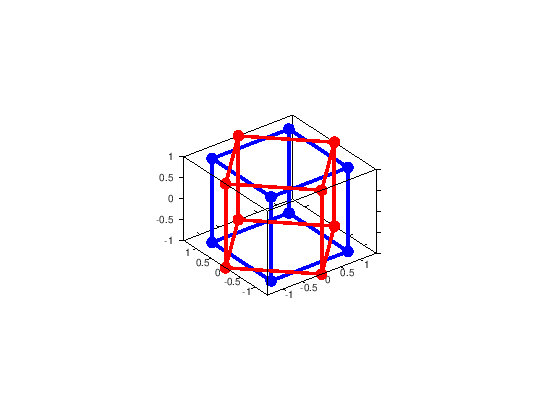

In [50]:
alpha=pi/4; % The rotation angle around e3

% Create a cube
X=[-1;  1; 1; -1; -1;  1; 1; -1;]; % X coordinates
Y=[-1; -1; 1;  1; -1; -1; 1;  1;]; % Y coordinates
Z=[-1; -1;-1; -1;  1;  1; 1;  1;]; % Z coordinates
V=[X(:) Y(:) Z(:)];

R=[cos(alpha) -sin(alpha) 0; sin(alpha)  cos(alpha)  0; 0 0 1]; % Rotation tensor

V2=V*R'; % Rotate

% Visualize
l=[1 2 3 4 1 5 6 7 8 5 6 2 3 7 8 4]; % Line description for plot
figure; hold on; % Open figure
plot3(V(l,1),V(l,2),V(l,3),'b.-','MarkerSize',30,'LineWidth',10); % Plot initial
plot3(V2(l,1),V2(l,2),V2(l,3),'r.-','MarkerSize',30,'LineWidth',10); % Plot final
view(3); axis equal; axis tight; box on; % Axis settings


## Rotating 2nd order tensors
Rotation of a second order tensor $\mathbf{A}$ with a rotation tensor $\mathbf{R}$ is written:

$$\mathbf{A}'=\mathbf{R}\mathbf{A}\mathbf{R}^\top$$

So why the aparent "double rotation"? To understand this pre- and post-rotation? 

Remember construction of vectors and tensor with the base vectors:
$$\mathbf{a}=a_i \mathbf{e}_i$$
$$\mathbf{A}=A_{ij} \mathbf{e}_i \otimes \mathbf{e}_j$$
It shows vector components involve 1 base vector while tensor components feature 2. The "double-rotation" can therefore be understood in terms of the pre-rotation rotating the first base-vector while the post-rotation rotates the second. 

$$\mathbf{A}'=A_{ij} \mathbf{R}(\mathbf{e}_i \otimes \mathbf{e}_j)\mathbf{R}^\top=A_{ij} (\mathbf{R}\mathbf{e}_i) \otimes (\mathbf{e}_j\mathbf{R}^\top)$$

### Double contraction with other tensors
As mentioned before the double contaction can be thought of as picking out a component if this occurs using a dyadic product of base tensors. However if a different vector is used it measures things allong that vector instead.  
E.g. an example is the calculation of deformation allong a fibre direction vector such as $\mathbf{m}$. A so called structure tensor $\mathbf{M}$ can be constructed: 
$$\mathbf{M}=\mathbf{m} \otimes \mathbf{m}$$

Next the double contraction of this tensor with a deformation tensor e.g. $\mathbf{U}$ gives the "stuff acting" or the "component" allong the direction $\mathbf{m}$. 

$$u_m=(\mathbf{U}\mathbf{m}) \cdot \mathbf{m}=\mathbf{U} : \mathbf{m} \otimes \mathbf{m}=\mathbf{U} : \mathbf{M}=U_{ij}M_{ij}$$


### DIY numerical implementation

In [67]:
R=[cos(pi/4) -sin(pi/4) 0;...
   sin(pi/4)  cos(pi/4) 0;...
   0          0         1]; % Rotation tensor for 45 degrees around Z
Up=[2 0 0; 0 1 0; 0 0 1] % Unrotated version of U
U=R*Up*R' % Rotated version of U
n=R*[1 0 0]' % Direction vector (e.g. a fibre direction) rotated anti-clockwise 45 deg. in XY-plane
un=dot(U*n,n) %"Double dot product" or "contraction"

Up =

   2   0   0
   0   1   0
   0   0   1

U =

   1.50000   0.50000   0.00000
   0.50000   1.50000   0.00000
   0.00000   0.00000   1.00000

n =

   0.70711
   0.70711
   0.00000

un =  2


## The gradient of a vector field
For the vector quantity $\mathbf{u}$ the so-called gradient is defined as: 
$$\mathbf{\nabla}\mathbf{u}=\mathbf{\nabla} \otimes \mathbf{u}=\frac{\partial u_{i}}{\partial x_j} \mathbf{e}_i \otimes \mathbf{e}_j=\mathrm{grad}(\mathbf{u})=
\begin{bmatrix} 
\frac{\partial u_{1}}{\partial x_1} & \frac{\partial u_{1}}{\partial x_2} & \frac{\partial u_{1}}{\partial x_3} \\
\frac{\partial u_{2}}{\partial x_1} & \frac{\partial u_{2}}{\partial x_2} & \frac{\partial u_{2}}{\partial x_3} \\
\frac{\partial u_{3}}{\partial x_1} & \frac{\partial u_{3}}{\partial x_2} & \frac{\partial u_{3}}{\partial x_3} \\
\end{bmatrix} 
$$
I.e. $\mathbf{\nabla}\mathbf{u}$ is a 2nd order tensor containing partial derivatives.   

If $\mathbf{u}$ is a displacement field then $\mathbf{\nabla}\mathbf{u}$ represents a tensor containing derivatives of displacement components (3 components) in all 3 directions (hence 3x3=9 components). 


## The deformation gradient tensor
The deformation gradient tensor is derived from:
$$\mathbf{F}=\mathbf{\nabla}\mathbf{u}+\mathbf{I}$$

The so-called polar decomposition of the deformation gradient tensor is defined as:
$$\mathbf{F}=\mathbf{R}\mathbf{U}=\mathbf{V}\mathbf{R}$$
Here $\mathbf{U}$ and $\mathbf{V}$ are called the right and left stretch tensors respectively. The eigen values of the stretch tensors are the principal stretches $\lambda_1$, $\lambda_2$, and $\lambda_3$.

## The right Cauchy-Green tensor
$$\mathbf{C}=\mathbf{U}^2=\mathbf{F}^\top\mathbf{F}$$
The eigen values of $\mathbf{C}$ are the squared principal stretches $\lambda_1^2$, $\lambda_2^2$, and $\lambda_3^2$.

### DIY numerical implementation

In [76]:
alpha=pi/4; % Rotation angle
R=[cos(alpha) -sin(alpha) 0; sin(alpha)  cos(alpha)  0; 0 0 1]; % Rotation tensor for alpha degrees around Z
%L=[2 0.5 1] %Define principal stretches
L=[2 1 1] %Stretches for undeformed initial state
U=[L(1) 0    0;...
   0    L(2) 0;...
   0    0    L(3)] % A stretch tensor U
F=R*U % Deformation gradient tensor 

L =

   2   1   1

U =

   2   0   0
   0   1   0
   0   0   1

F =

   1.41421  -0.70711   0.00000
   1.41421   0.70711   0.00000
   0.00000   0.00000   1.00000



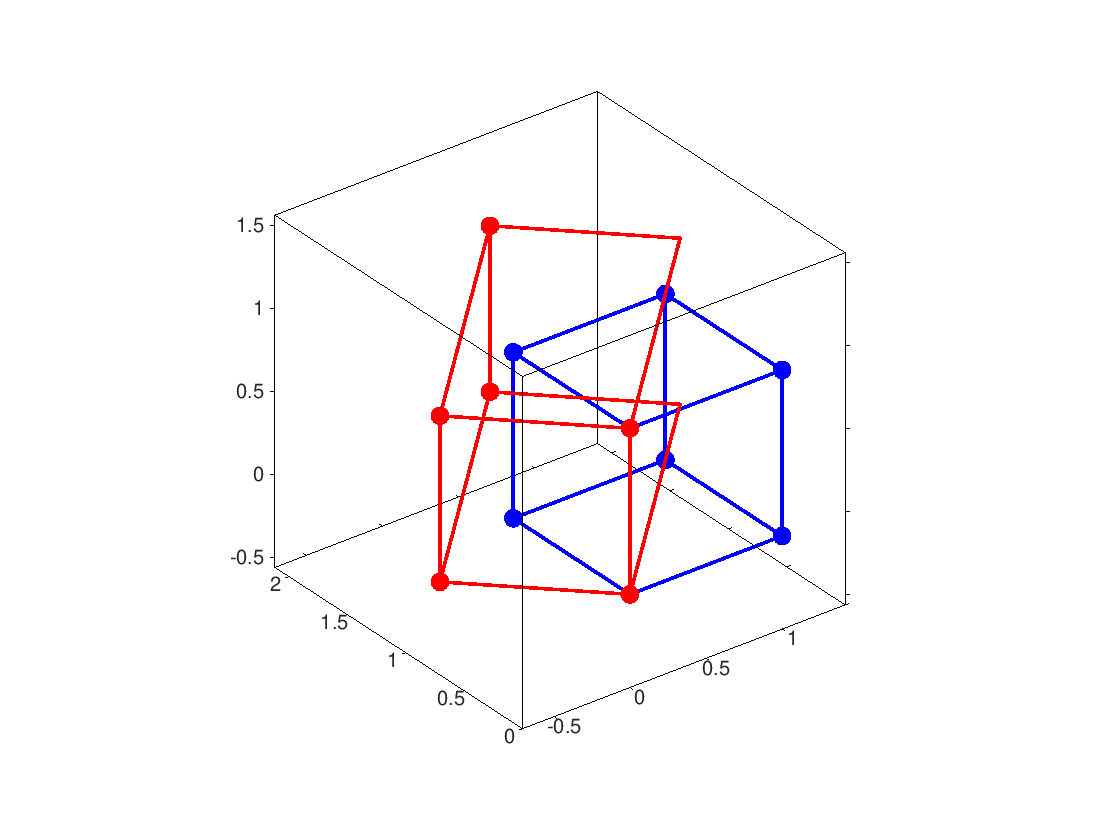

In [70]:
% Defining a point set
[x,y,z]=meshgrid(0:1:1); % 3D point set grids
X=[x(:) y(:) z(:)]; % A nx3 point set

% Deform the point set with F
Xn=(F*X')'; %Xn=Xn+2; % Deform

% Visualize 
l=[1 2 4 3 1 5 6 8 7 5 7 3 4 8 6 2 6 ]; % Line description for plot
hf=figure; hold on; % Open figure 
s=get(hf,'Position'); set(hf,'Position',[0 0 2*s(3) 2*s(4)]); set(gca,'FontSize',2*get(gca,'FontSize'));
plot3(X(l,1),X(l,2),X(l,3),'b.-','MarkerSize',50,'LineWidth',10); % Plot initial 
plot3(Xn(l,1),Xn(l,2),Xn(l,3),'r.-','MarkerSize',50,'LineWidth',10); % Plot initial
view(3); axis equal; box on; % Axis settings

In [72]:
% Compute displacement array
u=Xn-X 

% Create displacement component grids
Ux=reshape(u(:,1),size(x));
Uy=reshape(u(:,2),size(x));
Uz=reshape(u(:,3),size(x));

u =

   0.00000   0.00000   0.00000
  -0.70711  -0.29289   0.00000
   0.41421   1.41421   0.00000
  -0.29289   1.12132   0.00000
   0.00000   0.00000   0.00000
  -0.70711  -0.29289   0.00000
   0.41421   1.41421   0.00000
  -0.29289   1.12132   0.00000



In [73]:
% Compute gradient components
[Ugxx,Ugxy,Ugxz] = gradient(Ux,1,1,1);
[Ugyx,Ugyy,Ugyz] = gradient(Uy,1,1,1);
[Ugzx,Ugzy,Ugzz] = gradient(Uz,1,1,1);

% Compose gradient set
UG=[Ugxx(:) Ugxy(:) Ugxz(:)...
    Ugyx(:) Ugyy(:) Ugyz(:)...
    Ugzx(:) Ugzy(:) Ugzz(:)];

UG=reshape(UG',3,3,size(UG,1)); % Reshape as 3x3xn

grad_u=UG(:,:,1)
I=eye(3,3);
F=grad_u+I %Compute deformation gradient tensor
C=F'*F %The right Cauchy green tensor
[Q,Lsq]=eig(C); %The eigen decomposition
L=sqrt(diag(Lsq)) % The principal stretches

grad_u =

   0.41421   1.41421   0.00000
  -0.70711  -0.29289   0.00000
   0.00000   0.00000   0.00000

F =

   1.41421   1.41421   0.00000
  -0.70711   0.70711   0.00000
   0.00000   0.00000   1.00000

C =

   2.50000   1.50000   0.00000
   1.50000   2.50000   0.00000
   0.00000   0.00000   1.00000

L =

   1
   1
   2



# Principal components and eigen decomposition
The "spectral decomposition" or eigen decomposition of symmetric 2nd order tensor computes its eigenvalues and eigenvectors. 
E.g. for $\mathbf{U}$

$$\mathbf{U}=\sum_{i=1}^{3}\lambda_i (n_i \otimes n_i)$$

### DIY numerical implementation

In [77]:
U %Some diagonal 2nd order tensor
A=R*U*R' %A rotated variant
[Q,v]=eig(A); %The eigen decomposition
v

%Reconstruct A from eigen components
A_r=Q*v*Q'

%A_r=v(1,1)*Q(:,1)*Q(:,1)'+...
%    v(2,2)*Q(:,2)*Q(:,2)'+...
%    v(3,3)*Q(:,3)*Q(:,3)'

U =

   2   0   0
   0   1   0
   0   0   1

A =

   1.50000   0.50000   0.00000
   0.50000   1.50000   0.00000
   0.00000   0.00000   1.00000

v =

Diagonal Matrix

   1   0   0
   0   1   0
   0   0   2

A_r =

   1.50000   0.50000   0.00000
   0.50000   1.50000   0.00000
   0.00000   0.00000   1.00000



In [82]:
% "manually find" eigen system
alpha=-pi/4; % Rotation angle
R=[cos(alpha) -sin(alpha) 0; sin(alpha)  cos(alpha)  0; 0 0 1]; % Rotation tensor for alpha degrees around Z

A
Um=R*A*R' 
    

A =

   1.50000   0.50000   0.00000
   0.50000   1.50000   0.00000
   0.00000   0.00000   1.00000

Um =

   2.00000  -0.00000   0.00000
  -0.00000   1.00000   0.00000
   0.00000   0.00000   1.00000



# Strain
## The infinitesimal (or small) strain tensor:   
A strain tensor for small or infinitesimal motions (not just small deformations!)
$$\mathbf{\varepsilon}=\frac{1}{2}(\mathbf{\nabla}\mathbf{u}+\mathbf{\nabla}\mathbf{u}^\top)$$

What is wrong with it? Not valid for finite motions and deformations. E.g. it has magnitude for rigid body rotations


### DIY numerical implementation

In [58]:
E_small=0.5*(grad_u+grad_u') % Infinitesimal strain tensor
E_GL=0.5*(C-I) % Green-Lagrange strain tensor
E_log=eye(3,3); E_log(E_log>0)=log(diag(U)) % Logarithmic natural or Henky strain tensor 

E_small =

  -0.29289   0.00000   0.00000
   0.00000  -0.29289   0.00000
   0.00000   0.00000   0.00000

E_GL =

   0.0000e+00   5.0733e-18   0.0000e+00
   5.0733e-18   0.0000e+00   0.0000e+00
   0.0000e+00   0.0000e+00   0.0000e+00

E_log =

   0   0   0
   0   0   0
   0   0   0



## The Green-Lagrange strain tensor: 
$$\mathbf{E}=\frac{1}{2}(\mathbf{C}-\mathbf{I})=\frac{1}{2}(\mathbf{U}^2-\mathbf{I})=\frac{1}{2}(\mathbf{F}^\top\mathbf{F}-\mathbf{I})$$
The principal components can be written in terms of the principal stretches as:
$$E_i=\frac{1}{2}(\lambda_i^2-1)$$


## Side note: Other large deformation strain tensors
A general class (the so-called Seth-Hill class) of strain types is given by: 
$$\mathbf{E}=\begin{cases} \frac{1}{m}(\mathbf{U}^m-\mathbf{I}) & m\neq0 \\ \ln(\mathbf{U}) & m=0\end{cases}$$
If $m=2$ the Green-Lagrang strain is obtained.

![](strainsMoerman.jpg)


_K. M. Moerman, C. K. Simms, and T. Nagel, “Control of tension-compression asymmetry in Ogden hyperelasticity with application to soft tissue modelling,” J. Mech. Behav. Biomed. Mater., vol. 56, pp. 218–228, Mar. 2016, doi: [10.1016/j.jmbbm.2015.11.027](https://arxiv.org/abs/1512.03654)._


# Decomposition into spherical and deviatoric components
* We have already seen the trace of a 2nd order tensor tensor, it yields a scalar value:

$$a=\mathrm{tr}(\mathbf{A})=A_{11}+A_{22}+A_{33}=A_1+A_2+A_3$$

* The trace is an _invariant_ of a tensor i.e. it does not depend on coordinate system  
 
* The trace has a physical meaning as it relates to "spherical" or volumetric deformations, or hydrostatic components. 

* The so-called _spherical_ part of a 2nd order tensor: 
$$\mathrm{sph}(\mathbf{A})=\frac{1}{3}\mathrm{tr}(\mathbf{A})\mathbf{I}$$

* This leads to the definition of the so-called _deviatoric_ part of a 2nd order tensor: 
$$\mathrm{dev}(\mathbf{A})=\mathbf{A}-\mathrm{sph}(\mathbf{A})=\mathbf{A}-\frac{1}{3}\mathrm{tr}(\mathbf{A})\mathbf{I}$$

* Any 2nd order tensor can be defined as the sum of its spherical and deviatoric parts:
$$\mathbf{A}=\mathrm{dev}(\mathbf{A})+\mathrm{sph}(\mathbf{A})$$


In [59]:
A
trace_A=trace(A)
U
trace_U=trace(U)

A =

   1.00000   0.00000   0.00000
   0.00000   1.00000   0.00000
   0.00000   0.00000   1.00000

trace_A =  3
U =

   1   0   0
   0   1   0
   0   0   1

trace_U =  3


# Deviatoric and volumetric deformations
In the case of logarithmic strain $\mathbf{E}=\ln(\mathbf{U})$ the beforementioned additive split decomposes the tensor into the _volumetric strain_ (spherical part) and _deviatoric strain_ (deviatoric part). 

## The volumetric strain
This strain is responsible for volume change only:
$$\mathbf{E}_{vol}=\frac{1}{3}\mathrm{tr}(\mathbf{E})\mathbf{I}$$

## The deviatoric or isochoric (=volume preserving) strain
This strain is responsible for shape change only:
$$\mathbf{E}_{dev}=\mathbf{E}-\mathbf{E}_{vol}=\mathbf{E}-\frac{1}{3}\mathrm{tr}(\mathbf{E})\mathbf{I}$$

# Deviatoric and volumetric stress
In the case of the Cauchy stress $\boldsymbol{\sigma}$ the beforementioned additive split decomposes the tensor into the _volumetric stress_ (spherical part) and _deviatoric stress_ (deviatoric part). 

## The volumetric stress and the hydrostatic pressure
This stress is associated with volume change only:
$$\boldsymbol{\sigma}_{vol}=\frac{1}{3}\mathrm{tr}(\boldsymbol{\sigma})\mathbf{I}=-p\mathbf{I}$$
Where $p$ represents the hydrostatic pressure.

## The deviatoric stress
This stress is associated with shape change only:
$$\boldsymbol{\sigma}_{dev}=\boldsymbol{\sigma}-\boldsymbol{\sigma}_{vol}=\boldsymbol{\sigma}-\frac{1}{3}\mathrm{tr}(\boldsymbol{\sigma})\mathbf{I}$$

# General volumetric and deviatoric deformation metrics
## Revisiting the logarithmic strain tensor
For the logarithmic strain $\mathbf{E}=\ln{(\mathbf{U})}$: 
$$\tilde{\mathbf{E}}=\mathbf{E}_{dev}=\mathbf{E}-\frac{1}{3}\mathrm{tr}(\mathbf{E})\mathbf{I}=\mathbf{\ln{(\mathbf{U})}}-\frac{1}{3}\mathrm{tr}\big(\mathbf{\ln{(\mathbf{U})}}\big)\mathbf{I}$$

$$=\mathbf{\ln{(\mathbf{U})}}-\frac{1}{3}\big(\ln{(\lambda_1)}+\ln{(\lambda_2)}+\ln{(\lambda_3)}\big)\mathbf{I}$$

$$=\mathbf{\ln{(\mathbf{U})}}-\frac{1}{3}(\ln{(\lambda_1\lambda_2\lambda_3)})\mathbf{I}=\mathbf{\ln{(\mathbf{U})}}-\frac{1}{3}(\ln{(J)})\mathbf{I}$$

$$=\mathbf{\ln{(\mathbf{U})}}+\ln{(J^{-\frac{1}{3}})}\mathbf{I}=\ln{(J^{-\frac{1}{3}}\mathbf{\mathbf{U}})}$$
Here use was made of: 
The quantity $J$ is the volume ratio and is also referred to as the Jacobian. It is defined as: 
$$J=\det{(\mathbf{U})}=\det{(\mathbf{F})}=\lambda_1\lambda_2\lambda_3$$

Therefore, for deformations, the deviatoric-volumetric split involves multiplication of stretches with $J^{-\frac{1}{3}}$:
$$\tilde{\lambda_i}=J^{-\frac{1}{3}}\lambda_i$$


## Other deviatoric deformation tensors
The conclusion $\tilde{\lambda_i}=J^{-\frac{1}{3}}\lambda_i$ allows for the computation of other deviatoric deformation metrics. For instance for the deformation gradient tensor $\mathbf{F}=\mathbf{F}_{dev}+\mathbf{F}_{vol}$: 
$$\tilde{\mathbf{F}}=\mathbf{F}_{dev}=J^{-\frac{1}{3}}\mathbf{F}$$
Which leads to: 
$$\mathbf{F}_{vol}=\mathbf{F}-\mathbf{F}_{dev}=\mathbf{F}-J^{-\frac{1}{3}}\mathbf{F}$$

From this definition other deformation metrics can be identified e.g. for the right Caughy green tensor $\mathbf{C}=\mathbf{F}^\top\mathbf{F}$: 
$$\mathbf{C}_{dev}=J^{-\frac{2}{3}}\mathbf{C}=\tilde{\mathbf{C}}$$   


## Hooke's law of linear elasticity
Hooke's law for a linear elastic solid is usually written in terms of the Cauchy stress as:
$$\boldsymbol{\sigma}=\mathbf{\mathbb{C}}:\boldsymbol{\varepsilon}$$

$$\sigma_{ij}=C_{ijkl}\varepsilon_{kl}$$

This is the most general form of Hooke's law and could include anisotropy. 
Here $\mathbf{\mathbb{C}}$ is the 4th order (3x3x3x3) stiffness tensor and is "super-summetric" since: 
$$C_{ijkl}=C_{jikl}=C_{klij}$$

* The stiffness tensor entries relate to particular stiffness constants and also orientation and deformation mode information.   

* Up to 6 distict deformation modes (e.g. allong fibre strain, across fiber strain, etc.) and associated stiffness constants are contained in the the tensor.   

* For an isotropic material (where the stiffness does not depend on direction) the stiffness tensor has two eigenvalues $\mu$ and $\kappa$, which are the material shear-modulus and bulk-modulus respectively. 

* The associated strain modes the tensor "picks out" to go allong with these parameters is the deviatoric deformation and the volumetric deformation respectively. 


## Hooke's law of linear elasticity
Hooke's law for a linear elastic solid is usually written in terms of the Cauchy stress as:
$$\boldsymbol{\sigma}=\mathbf{\mathbb{C}}:\boldsymbol{\varepsilon}$$

$$\sigma_{ij}=C_{ijkl}\varepsilon_{kl}$$


![](C_hooke_2.png)

The strain energy density function $\Psi$  (units of energy per volume), for Hooke's law of a linear elastic solid is given by:
$$\Psi=\frac{1}{2}\mathbf{\mathbb{C}}:\boldsymbol{\varepsilon}:\boldsymbol{\varepsilon}=\frac{1}{2}\mathbf{\sigma}:\boldsymbol{\varepsilon}$$

$$\Psi=\frac{1}{2}C_{ijkl}\varepsilon_{kl}\varepsilon_{ij}=\frac{1}{2}\sigma_{ij}\varepsilon_{ij}$$

Alternatively the Cauchy stress can be derived from: 
$$\boldsymbol{\sigma}=\frac{\partial \Psi}{\partial \boldsymbol{\varepsilon}}$$


## Hooke's law for a linear elastic isotropic material

* The scalar strain energy density (energy per volume unit) for a linear elastic and isotropic Hookean solid is: 
$$\Psi=\mu \mathrm{tr}(\mathrm{dev}(\boldsymbol{\varepsilon})^2)+\frac{\kappa}{2}\mathrm{tr}(\mathrm{sph}(\boldsymbol{\varepsilon})^2) $$  
  
* $\mu$ is the shear modulus (resistance to pure shape change), sometimes called $G$
  
  
* $\kappa$ is the bulk modulus (resistance to pure volume change)
   
   
* The Cauchy stress can be derived using $\boldsymbol{\sigma}=\frac{\partial \Psi}{\partial \boldsymbol{\varepsilon}}$, which leads to: 

$$\boldsymbol{\sigma}=2\mu \mathrm{dev}(\boldsymbol{\varepsilon})+3\kappa\mathrm{sph}(\boldsymbol{\varepsilon})$$  

* The above are isotropic "eigen stiffness" parameters, you may be more familiar with the Youngs modulus $E$ and the Poisson's ratio $\nu$ which can be derived from them: 
 
$$E=\frac{9 \kappa \mu}{3\kappa+\mu}$$  

$$\nu=\frac{3 \kappa-2 \mu}{2(3\kappa+\mu)}$$

* Or the inverse relationship: 
$$\mu=\frac{E}{2(1+\nu)}$$  

$$\kappa=\frac{E}{3(1-2\nu)}$$  

* What a happens when $\nu=0.5$? $\mu=\frac{E}{3}$ and $\kappa=\frac{E}{0}=\infty$....

_See table all the way at the end of the [Wikipedia page for the Poisson's ratio](https://en.wikipedia.org/wiki/Poisson%27s_ratio;)_ 

## Hooke's law for a linear elastic isotropic material

* The strain energy for a linear elastic and isotropic Hookean solid is: 
$$\Psi=\mu \mathrm{tr}(\mathrm{dev}(\boldsymbol{\varepsilon})^2)+\frac{\kappa}{2}\mathrm{tr}(\mathrm{sph}(\boldsymbol{\varepsilon})^2) $$  
  

* Using $\boldsymbol{\sigma}=\frac{\partial \Psi}{\partial \boldsymbol{\varepsilon}}$ provides the Cauchy stress as: 
$$\boldsymbol{\sigma}=2\mu \mathrm{dev}(\boldsymbol{\varepsilon})+3\kappa\mathrm{sph}(\boldsymbol{\varepsilon})$$  

* Which can be rewritten:   
$$\boldsymbol{\sigma}=2\mu (\boldsymbol{\varepsilon}-\frac{1}{3}\mathrm{tr}(\boldsymbol{\varepsilon})\mathbf{I})+3\kappa(\frac{1}{3}\mathrm{tr}(\boldsymbol{\varepsilon})\mathbf{I}))=2\mu (\boldsymbol{\varepsilon}-\frac{1}{3}\mathrm{tr}(\boldsymbol{\varepsilon})\mathbf{I})+\kappa(\mathrm{tr}(\boldsymbol{\varepsilon})\mathbf{I}))$$
 
 $$\sigma_{ij}=C_{ijkl}\varepsilon_{kl}$$
 
![](C_hooke.png)